In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Задания к уроку 5</h3>
<b>1.</b> Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
# Колесо европейской рулетки разбито на 37 секторов: 36 пронумерованных 
# от 1 до 36 ячеек и плюс «зеро». Числа расположены в случайном порядке.
def move_roulette():
    val = np.random.randint(0,37)
    if val == 0:
        print("Зеро")
    elif val in [3, 12, 7, 18, 9, 14, 1, 16, 5, 23, 30, 36, 27, 34, 25, 
               21, 19, 32]:
        print("красное поле ", val)
    else:
        print("черное поле ", val)
    return None
for i in range(0, 10):
    print(f"В {i+1}-ом опыте выпало:")
    move_roulette()

В 1-ом опыте выпало:
красное поле  27
В 2-ом опыте выпало:
черное поле  33
В 3-ом опыте выпало:
красное поле  34
В 4-ом опыте выпало:
красное поле  18
В 5-ом опыте выпало:
красное поле  3
В 6-ом опыте выпало:
красное поле  14
В 7-ом опыте выпало:
красное поле  3
В 8-ом опыте выпало:
красное поле  7
В 9-ом опыте выпало:
черное поле  29
В 10-ом опыте выпало:
черное поле  13


<b>2.</b> Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
<p>Пусть событие A выпадение красного поля, а событие B выпадение черного поля, тогда P(A)=18/37, P(B)=18/37, тогда вероятность выпадения красного или черного поля равна $P(A+B)=36/37$</p>
<p>Пусть событие A выпадение красного поля в первый раз, а событие B выпадение красного поля во второй раз. Эти события независимы и следовательно $$P(AB)=P(A)P(B)=\left({\frac{18}{37}}\right)^2$$ </p>

Пусть рулетку крутят 9 раз, х - выпадение красного поля, n - количество выпадений

In [3]:
p = 18/37
q = (1 - p)
sumP = 0
arP = []
arSum = []
for i in range(0, 10):
    binom = np.math.factorial(9)/(np.math.factorial(i)*np.math.factorial(9-i))
    P = binom*(p**i)*(q**(9-i))
    sumP = sumP+P
    print(np.around(P, decimals=5), np.around(sumP, decimals=3))
    arP.append(P)
    arSum.append(sumP)
# print(arP)

0.00248 0.002
0.02117 0.024
0.08022 0.104
0.17734 0.281
0.25201 0.533
0.23874 0.772
0.15079 0.923
0.06122 0.984
0.0145 0.998
0.00153 1.0


| $x_n$ | $x_0$ | $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ | $x_6$ | $x_7$ | $x_8$ | $x_9$ |
| ---   | ---   | ---   | ---   | ---   | ---   | ---   | ---   | ---   | --- | ---   |
|   x   |   0   |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |
|   P   | 0.00248 | 0.02117 |0.08022|0.17734|0.25201|0.23874|0.15079|0.06122|0.0145|0.00153|

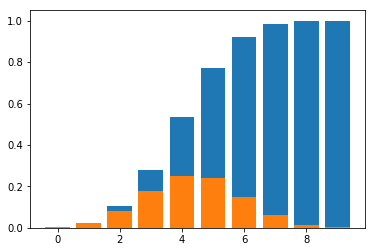

In [4]:
n = range(0, 10)
plt.bar(n, arSum)
plt.bar(n, arP);

<p>Сгенерируйте десять выборок случайных чисел $х_0, …, х_9$
и постройте гистограмму распределения случайной суммы $х_0+х_1+ … +х_9$</p>

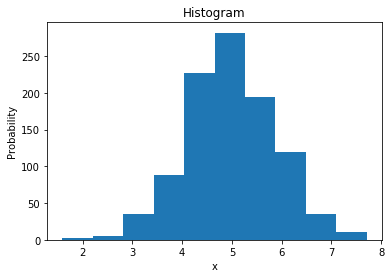

In [5]:
n = 1000
x0 = np.random.rand(n)
x1 = np.random.rand(n)
x2 = np.random.rand(n)
x3 = np.random.rand(n)
x4 = np.random.rand(n)
x5 = np.random.rand(n)
x6 = np.random.rand(n)
x7 = np.random.rand(n)
x8 = np.random.rand(n)
x9 = np.random.rand(n)
x = x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9
num_bins = 10
n, bins, patches = plt.hist(x, num_bins)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram');

<b>3.</b> 1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.


In [6]:
def monte_carlo(N):
    p1 = 1/37 # выпадение зеро
    p2 = 18/37 # выпадение красного или черного поля
    q1 = (1 - p1)
    q2 = (1 - p2)
    j1 = j2 = j3 = 0
    for i in range(0, N):
        val = np.random.randint(0,37)
        if val == 0:
            print(f"В {i+1}-ом опыте выпало:")
            print("  Зеро")
            j1 = j1 + 1
            binom1 = np.math.factorial(N)/(np.math.factorial(j1)*np.math.factorial(N-j1))
            P1 = binom1*(p1**j1)*(q1**(N-j1))
            print(f"  Вероятность выпадения зеро {j1} из {N} раз: ", np.around(P1, decimals=5))
        elif val in [3, 12, 7, 18, 9, 14, 1, 16, 5, 23, 30, 36, 27, 34, 25, 
                   21, 19, 32]:
            print(f"В {i+1}-ом опыте выпало:")
            print("  красное поле ", val)
            j2 += 1
            binom2 = np.math.factorial(N)/(np.math.factorial(j2)*np.math.factorial(N-j2))
            P2 = binom2*(p2**j2)*(q2**(N-j2))
            print(f"  Вероятность выпадения красного поля {j2} из {N} раз: ", np.around(P2, decimals=5))
        else:
            print(f"В {i+1}-ом опыте выпало:")
            print("  черное поле ", val)
            j3 += 1
            binom3 = np.math.factorial(N)/(np.math.factorial(j3)*np.math.factorial(N-j3))
            P3 = binom3*(p2**j3)*(q2**(N-j3))
            print(f"  Вероятность выпадения черного поля {j3} из {N} раз: ", np.around(P3, decimals=5))
monte_carlo(9)

В 1-ом опыте выпало:
  красное поле  1
  Вероятность выпадения красного поля 1 из 9 раз:  0.02117
В 2-ом опыте выпало:
  черное поле  4
  Вероятность выпадения черного поля 1 из 9 раз:  0.02117
В 3-ом опыте выпало:
  красное поле  34
  Вероятность выпадения красного поля 2 из 9 раз:  0.08022
В 4-ом опыте выпало:
  черное поле  35
  Вероятность выпадения черного поля 2 из 9 раз:  0.08022
В 5-ом опыте выпало:
  красное поле  27
  Вероятность выпадения красного поля 3 из 9 раз:  0.17734
В 6-ом опыте выпало:
  черное поле  15
  Вероятность выпадения черного поля 3 из 9 раз:  0.17734
В 7-ом опыте выпало:
  черное поле  29
  Вероятность выпадения черного поля 4 из 9 раз:  0.25201
В 8-ом опыте выпало:
  черное поле  8
  Вероятность выпадения черного поля 5 из 9 раз:  0.23874
В 9-ом опыте выпало:
  красное поле  14
  Вероятность выпадения красного поля 4 из 9 раз:  0.25201


<p>2. Повторите расчеты биномиальных коэффициентов и вероятностей $k$ успехов в последовательности из $n$ независимых испытаний, взяв другие значения $n$ и $k$.</p>

In [7]:
monte_carlo(5)

В 1-ом опыте выпало:
  черное поле  31
  Вероятность выпадения черного поля 1 из 5 раз:  0.16914
В 2-ом опыте выпало:
  черное поле  24
  Вероятность выпадения черного поля 2 из 5 раз:  0.32048
В 3-ом опыте выпало:
  красное поле  23
  Вероятность выпадения красного поля 1 из 5 раз:  0.16914
В 4-ом опыте выпало:
  красное поле  21
  Вероятность выпадения красного поля 2 из 5 раз:  0.32048
В 5-ом опыте выпало:
  красное поле  9
  Вероятность выпадения красного поля 3 из 5 раз:  0.30361


<b>4.</b> Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений $n$ и $k$

In [8]:
import itertools
for p in itertools.permutations("4532", 2):
    print(''.join(str(x) for x in p))

45
43
42
54
53
52
34
35
32
24
25
23


<b>5.</b> Дополните код расчетом коэффициента корреляции $x$ и $y$ по формуле
$$R=\frac{\sum(x_i-x_m)(y_i-y_m)}{\sqrt{\sum(x_i-x_m)^2\sum(y_i-y_m)^2}}$$

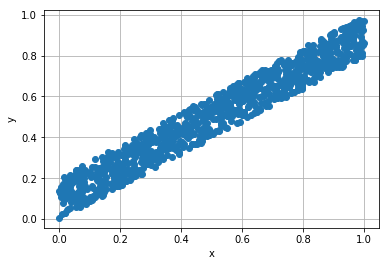

0.9712555041101236


In [9]:
n = 1000
r = 0.8
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
# c = np.corrcoef(x, y) 
xm = np.sum(x)/n
ym = np.sum(y)/n
x1 = x - xm
y1 = y - ym
Rxy = np.sum(x1 * y1)/np.sqrt(np.sum(x1 * x1) * np.sum(y1 * y1))
print(Rxy)